In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [3]:
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract = True
)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)

In [5]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [7]:
df.index = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")

In [8]:
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<AxesSubplot:xlabel='Date Time'>

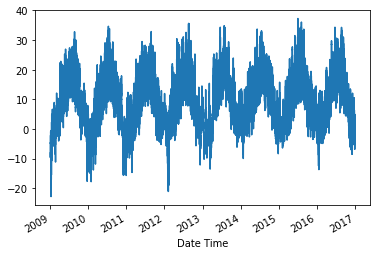

In [9]:
temp = df['T (degC)']
temp.plot()

In [10]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [11]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [12]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2022-11-22 03:18:35.138832: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [15]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10


2022-11-22 03:18:35.581222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1875/1875 [==============================] - 12s 5ms/step - loss: 38.1108 - root_mean_squared_error: 6.1734 - val_loss: 1.5165 - val_root_mean_squared_error: 1.2315


2022-11-22 03:18:49.225618: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5194 - root_mean_squared_error: 1.5873 - val_loss: 0.6375 - val_root_mean_squared_error: 0.7984
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9113 - root_mean_squared_error: 0.9546 - val_loss: 0.5445 - val_root_mean_squared_error: 0.7379
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7211 - root_mean_squared_error: 0.8492 - val_loss: 0.5085 - val_root_mean_squared_error: 0.7131
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6754 - root_mean_squared_error: 0.8218 - val_loss: 0.5009 - val_root_mean_squared_error: 0.7078
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6618 - root_mean_squared_error: 0.8135 - val_loss: 0.4894 - val_root_mean_squared_error: 0.6995
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6555 - root_mean_squared_error: 0.8096 - val_loss: 0

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [17]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,-9.638542,-9.67
1,-9.483864,-9.17
2,-8.597153,-8.10
3,-7.147614,-7.66
4,-6.975907,-7.04
...,...,...
59995,5.954576,6.07
59996,7.154223,9.88
59997,12.215264,13.53
59998,16.160093,15.43


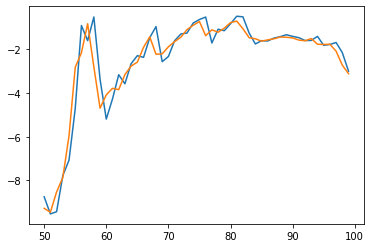

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [19]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,15.542015,14.02
1,13.433920,13.67
2,13.133415,12.27
3,11.679293,11.19
4,10.561471,10.85
...,...,...
4995,17.197794,18.27
4996,17.332790,17.85
4997,17.229471,16.65
4998,15.872326,15.85


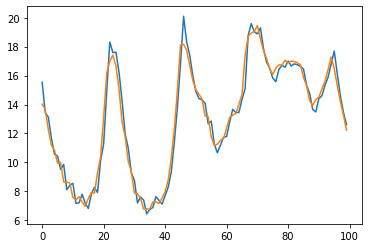

In [20]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [21]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

,Test Predictions,Actuals
0,14.469516,13.99
1,13.330725,13.46
2,12.949517,12.93
3,12.548346,12.43
4,12.088024,12.17
...,...,...
5081,-1.166507,-0.98
5082,-1.616492,-1.40
5083,-1.826996,-2.75
5084,-3.155351,-2.89


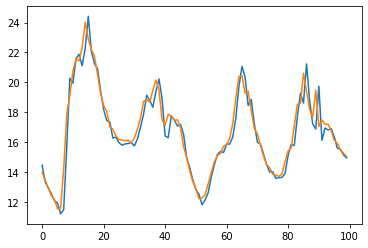

In [22]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

## Part 2 (MultiVariate Time Series Forecasting with LSTM, GRU and 1d-CNNs)

In [23]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.469516    13.99
 1       13.330725    13.46
 2       12.949517    12.93
 3       12.548346    12.43
 4       12.088024    12.17
 ...           ...      ...
 5081    -1.166507    -0.98
 5082    -1.616492    -1.40
 5083    -1.826996    -2.75
 5084    -3.155351    -2.89
 5085    -3.131275    -3.93
 
 [5086 rows x 2 columns],
 0.6417753576298303)

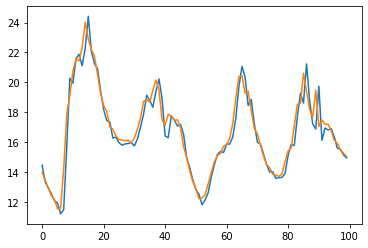

In [24]:
plot_predictions1(model1, X_test, y_test)

In [25]:
# 1 D CNN
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [26]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [27]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7658 - root_mean_squared_error: 1.6631 - val_loss: 0.8301 - val_root_mean_squared_error: 0.9111
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8748 - root_mean_squared_error: 0.9353 - val_loss: 0.5829 - val_root_mean_squared_error: 0.7635
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7088 - root_mean_squared_error: 0.8419 - val_loss: 0.5389 - val_root_mean_squared_error: 0.7341
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6774 - root_mean_squared_error: 0.8231 - val_loss: 0.5082 - val_root_mean_squared_error: 0.7129
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6699 - root_mean_squared_error: 0.8185 - val_loss: 0.5265 - val_root_mean_squared_error: 0.7256
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6618 - root_mean_squared_error: 0.8135 - val_loss: 0

In [28]:
# GRU
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [29]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [30]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 42.0710 - root_mean_squared_error: 6.4862 - val_loss: 1.4466 - val_root_mean_squared_error: 1.2028
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.5865 - root_mean_squared_error: 1.6083 - val_loss: 0.6958 - val_root_mean_squared_error: 0.8341
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0209 - root_mean_squared_error: 1.0104 - val_loss: 0.5745 - val_root_mean_squared_error: 0.7580
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7516 - root_mean_squared_error: 0.8670 - val_loss: 0.5150 - val_root_mean_squared_error: 0.7176
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6841 - root_mean_squared_error: 0.8271 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6638 - root_mean_squared_error: 0.8147 - val_los

In [31]:
temp_df = pd.DataFrame({'Temperature': temp})
temp_df

,Temperature
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


In [32]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [33]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / day)) 
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / day)) 
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [34]:
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [36]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [37]:
def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [38]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [39]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [43]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean)/temp_training_std
    return X

In [44]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [45]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [46]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [47]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 47.2471 - root_mean_squared_error: 6.8736 - val_loss: 4.3060 - val_root_mean_squared_error: 2.0751
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 5.1563 - root_mean_squared_error: 2.2707 - val_loss: 2.5757 - val_root_mean_squared_error: 1.6049
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.4785 - root_mean_squared_error: 1.5743 - val_loss: 1.4378 - val_root_mean_squared_error: 1.1991
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4089 - root_mean_squared_error: 1.1870 - val_loss: 0.9182 - val_root_mean_squared_error: 0.9582
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0164 - root_mean_squared_error: 1.0082 - val_loss: 0.6921 - val_root_mean_squared_error: 0.8319
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8038 - root_mean_squared_error: 0.8965 - val_

(      Predictions  Actuals
 0       13.104276    13.46
 1       12.627015    12.93
 2       12.210425    12.43
 3       11.928077    12.17
 4       12.069392    11.55
 ...           ...      ...
 5080    -0.940529    -0.98
 5081    -1.258029    -1.40
 5082    -1.571777    -2.75
 5083    -2.934964    -2.89
 5084    -3.054942    -3.93
 
 [5085 rows x 2 columns],
 0.4967365675812023)

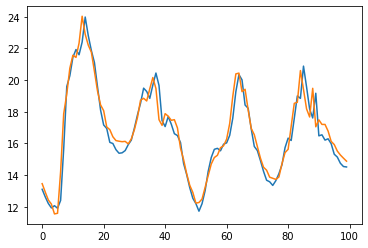

In [48]:
plot_predictions1(model4, X2_test, y2_test)

### Predicting temperature and pressure  

In [90]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [91]:
def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [92]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [93]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [94]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
    
def preprocess_output3(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [95]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [96]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [97]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [98]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [99]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1728 - root_mean_squared_error: 0.4157 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1803
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1129
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0076 - root_mean_squared_error: 0.0871 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_l

In [100]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                           'Temperature Actuals': temp_actuals,
                           'Pressure Predictions': p_preds,
                           'Pressure Actuals': p_actuals
                           })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.425942,0.412451,-0.787937,-0.793439
1,0.384490,0.353683,-0.776474,-0.763123
2,0.343223,0.323123,-0.743011,-0.721893
3,0.341698,0.250251,-0.693826,-0.652773
4,0.289739,0.254952,-0.609467,-0.652773
...,...,...,...,...
95,0.706877,0.716869,-0.422831,-0.416310
96,0.671302,0.687485,-0.422454,-0.399333
97,0.654629,0.663978,-0.407362,-0.399333
98,0.653834,0.641646,-0.401710,-0.400546


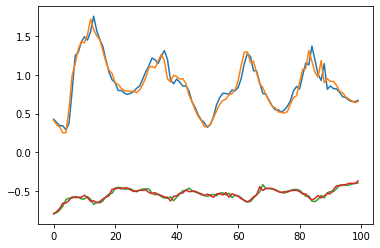

In [101]:
plot_predictions2(model5, X3_test, y3_test)

In [102]:
def postprocess_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr

def postprocess_p(arr):
    arr = (arr*p_training_std3) + p_training_mean3
    return arr

In [103]:
def plot_predictions_postprocess(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                           'Temperature Actuals': temp_actuals,
                           'Pressure Predictions': p_preds,
                           'Pressure Actuals': p_actuals
                           })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.044786,12.93,982.475403,982.43
1,12.692114,12.43,982.569946,982.68
2,12.341013,12.17,982.845886,983.02
3,12.328037,11.55,983.251465,983.59
4,11.885970,11.59,983.947144,983.59
...,...,...,...,...
95,15.434983,15.52,985.486267,985.54
96,15.132311,15.27,985.489380,985.68
97,14.990458,15.07,985.613831,985.68
98,14.983690,14.88,985.660461,985.67


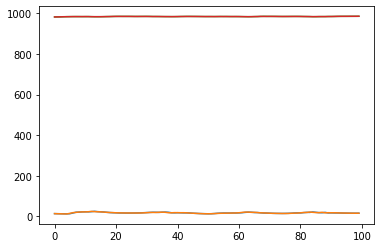

In [104]:
post_processed_df = plot_predictions_postprocess(model5, X3_test, y3_test)
post_processed_df

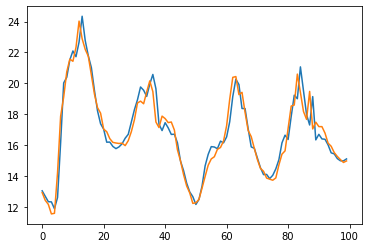

In [105]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

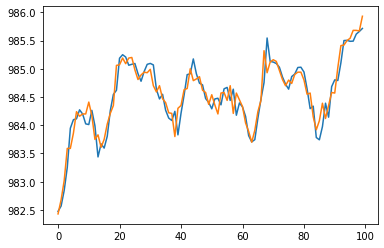

In [106]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])